The data rotates around one thing, that os to find out the frauds in the automobiles insurance and avoid them in future, 
the data givem is classification data and the target variable is fraud reported, this model will help us predict any 
such fraud in future

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
ai=pd.read_csv('Auto_insurance.csv')
ai

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
ai.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [4]:
ai.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [5]:
at=ai.drop(['policy_number','policy_bind_date','policy_csl','insured_zip','insured_hobbies','_c39'], axis=1)

Some columns are not important for the prediction of the data are therefore dropped from the data.

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
at['policy_state']=le.fit_transform(at['policy_state'])
at['insured_sex']=le.fit_transform(at['insured_sex'])
at['insured_education_level']=le.fit_transform(at['insured_education_level'])
at['insured_occupation']=le.fit_transform(at['insured_occupation'])
at['insured_relationship']=le.fit_transform(at['insured_relationship'])
at['incident_date']=le.fit_transform(at['incident_date'])
at['incident_type']=le.fit_transform(at['incident_type'])
at['collision_type']=le.fit_transform(at['collision_type'])
at['incident_severity']=le.fit_transform(at['incident_severity'])
at['authorities_contacted']=le.fit_transform(at['authorities_contacted'])
at['incident_state']=le.fit_transform(at['incident_state'])
at['incident_location']=le.fit_transform(at['incident_location'])
at['incident_city']=le.fit_transform(at['incident_city'])
at['property_damage']=le.fit_transform(at['property_damage'])
at['police_report_available']=le.fit_transform(at['police_report_available'])
at['auto_make']=le.fit_transform(at['auto_make'])
at['auto_model']=le.fit_transform(at['auto_model'])
at['fraud_reported']=le.fit_transform(at['fraud_reported'])

In [7]:
at.dtypes

months_as_customer               int64
age                              int64
policy_state                     int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_date                    int32
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                        int64
police_report_available  

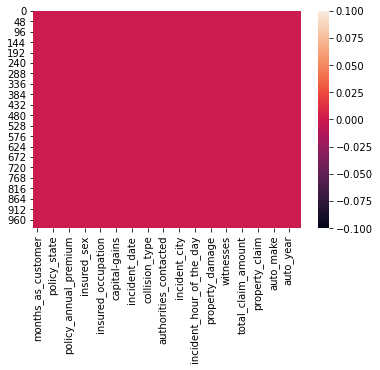

In [8]:
sns.heatmap(at.isnull())

In [9]:
at.describe()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1.01400,1136.000000,1256.406150,1.101000e+06,0.463000,2.966000,6.653000,2.416000,...,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,0.83096,611.864673,244.167395,2.297407e+06,0.498879,1.948497,4.019048,1.681003,...,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,0.00000,500.000000,433.330000,-1.000000e+06,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,0.00000,500.000000,1089.607500,0.000000e+00,0.000000,1.000000,3.000000,1.000000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,1.00000,1000.000000,1257.200000,0.000000e+00,0.000000,3.000000,7.000000,2.000000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,2.00000,2000.000000,1415.695000,0.000000e+00,1.000000,5.000000,10.000000,4.000000,...,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,2.00000,2000.000000,2047.590000,1.000000e+07,1.000000,6.000000,13.000000,5.000000,...,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


In [10]:
at.corr()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,-0.000328,0.026807,0.005018,0.015498,0.060925,-0.000833,0.009814,0.069727,...,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,-0.014533,0.029188,0.014404,0.018126,0.073337,0.000969,0.017220,0.074832,...,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_state,-0.000328,-0.014533,1.000000,0.010033,0.012455,-0.029580,-0.020481,-0.034327,-0.031215,-0.018506,...,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_deductable,0.026807,0.029188,0.010033,1.000000,-0.003245,0.010870,-0.009733,0.015217,-0.046733,-0.022945,...,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.012455,-0.003245,1.000000,-0.006247,0.038853,-0.019715,0.035922,0.001925,...,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,-0.029580,0.010870,-0.006247,1.000000,0.010688,-0.019357,0.023422,0.077495,...,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_sex,0.060925,0.073337,-0.020481,-0.009733,0.038853,0.010688,1.000000,0.009002,-0.006160,0.002855,...,0.042463,0.020864,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873
insured_education_level,-0.000833,0.000969,-0.034327,0.015217,-0.019715,-0.019357,0.009002,1.000000,-0.020298,-0.023488,...,0.019211,0.036141,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,0.043509,0.008808
insured_occupation,0.009814,0.017220,-0.031215,-0.046733,0.035922,0.023422,-0.006160,-0.020298,1.000000,-0.010171,...,-0.014794,-0.011083,0.003692,0.020211,0.003004,-0.000829,0.042621,0.020584,-0.006676,0.001564
insured_relationship,0.069727,0.074832,-0.018506,-0.022945,0.001925,0.077495,0.002855,-0.023488,-0.010171,1.000000,...,0.002362,-0.024200,0.002229,0.029014,0.007332,-0.006256,-0.027028,0.063671,-0.023345,0.021043


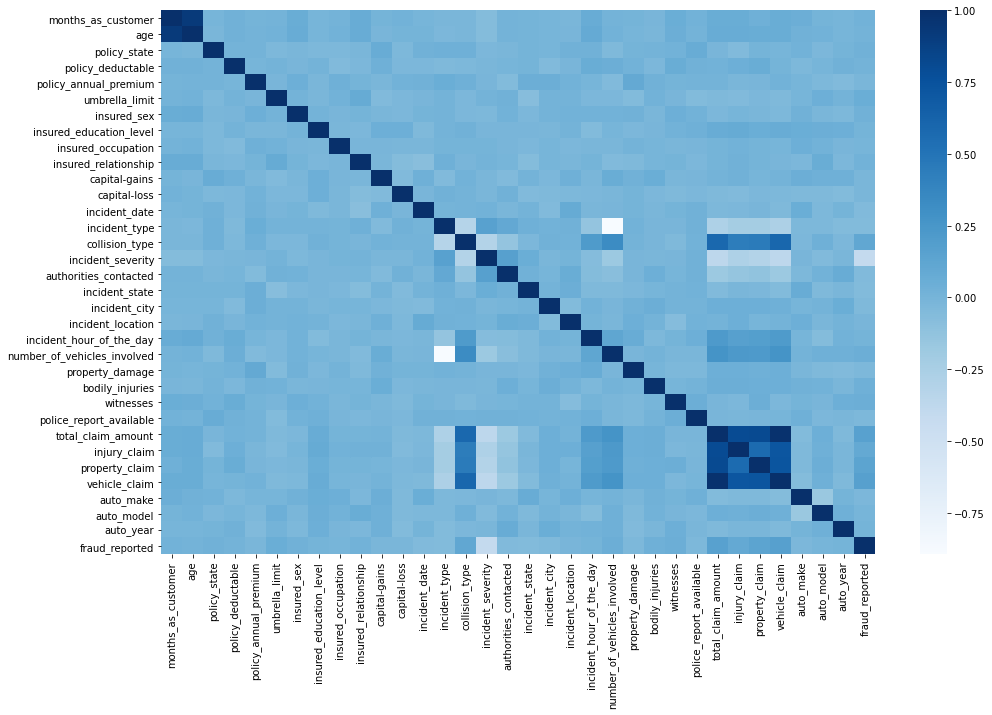

In [11]:
plt.figure(figsize=(16,10))
sns.heatmap(at.corr(), cmap='Blues')

In [12]:
at.dtypes

months_as_customer               int64
age                              int64
policy_state                     int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_date                    int32
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                        int64
police_report_available  

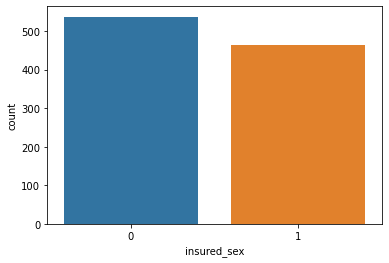

In [13]:
sns.countplot(at['insured_sex'])

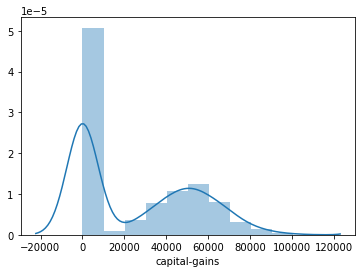

In [15]:
sns.distplot(at['capital-gains'])

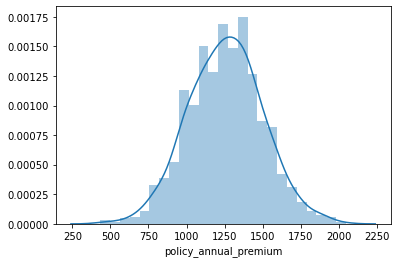

In [16]:
sns.distplot(at['policy_annual_premium'])

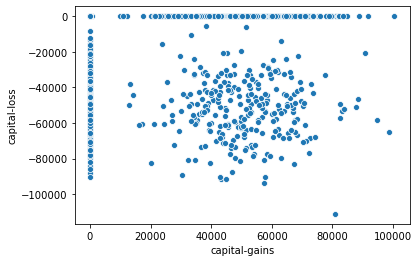

In [17]:
sns.scatterplot(x='capital-gains', y='capital-loss', data=at)

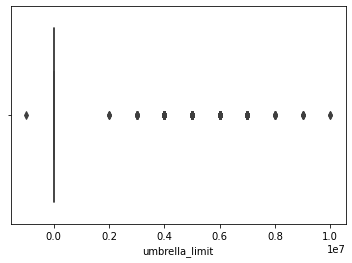

In [21]:
sns.boxplot(at['umbrella_limit'])

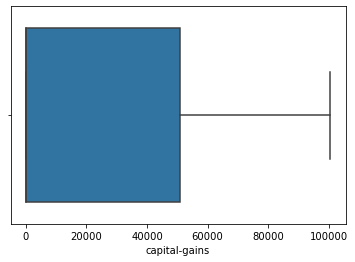

In [22]:
sns.boxplot(at['capital-gains'])

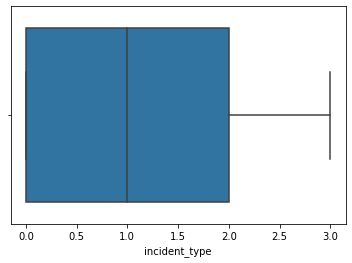

In [25]:
sns.boxplot(at['incident_type'])

Now we will try to remove the outliers from the data as they decrease the performance and efficiency of the data

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(at))
au=at[(z<3).all(axis=1)]
au

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1000,1406.91,0,1,4,2,0,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,1,2000,1197.22,5000000,1,4,6,2,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,2,2000,1413.14,5000000,0,6,11,3,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,0,2000,1415.74,6000000,0,6,1,4,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,0,1000,1583.91,6000000,1,0,11,4,...,1,1,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,1000,1310.80,0,0,5,2,4,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,0,1000,1436.79,0,0,6,9,5,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,2,500,1383.49,3000000,0,5,1,2,...,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,0,2000,1356.92,5000000,1,0,5,5,...,1,2,46980,5220,5220,36540,1,5,1998,0


In [28]:
au.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_date                  0.002604
incident_type                  0.090563
collision_type                -0.194015
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_location             -0.003369
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage                0.101196
bodily_injuries                0.003757
witnesses                      0.026211


(array([740.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 240.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

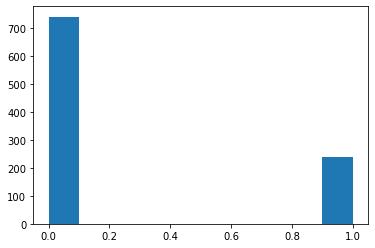

In [43]:
plt.hist(au['fraud_reported'])

(array([498.,   9.,  33.,  78., 106., 123.,  82.,  32.,  14.,   5.]),
 array([     0.,  10050.,  20100.,  30150.,  40200.,  50250.,  60300.,
         70350.,  80400.,  90450., 100500.]),
 <a list of 10 Patch objects>)

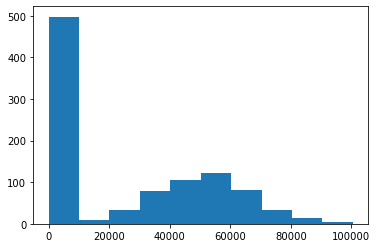

In [44]:
plt.hist(au['capital-gains'])

we can can see there are around 34 columns and that is more as compare to normal data, therefore we will use pca technique and 
remove the columns are that similar as this will avoid the curse of dimensionality

In [45]:
x=au.iloc[:,0:-1]
y=au.iloc[:,-1]

In [47]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x=sd.fit_transform(x)

In [49]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
x=pca.fit_transform(x)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
max_scr=0
for rstate in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rstate, test_size=0.20)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    y_pred=lg.predict(x_test)
    acc_scr=accuracy_score(y_test,y_pred)
    if acc_scr>max_scr:
        max_scr=acc_scr
        final_state=rstate
        
print('The corresponding random state',final_state,'to maximum accuracy score is', max_scr)

The corresponding random state 68 to maximum accuracy score is 0.8163265306122449


In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=68, test_size=0.20)
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('Confusion matrix',confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy Score 0.8163265306122449
Confusion matrix [[158   5]
 [ 31   2]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       163
           1       0.29      0.06      0.10        33

    accuracy                           0.82       196
   macro avg       0.56      0.51      0.50       196
weighted avg       0.74      0.82      0.76       196



In [54]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [55]:
lg=LogisticRegression()
svc=SVC()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
gnb=GaussianNB()

In [56]:
models=[]
models.append((lg,'LogisticRegression'))
models.append((svc,'svc'))
models.append((knn,'KNeighborsClassifier'))
models.append((dtc,'DecisionTreeClassifier'))
models.append((gnb,'GaussianNB'))

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

********** LogisticRegression *****************
Accuracy Score 0.8163265306122449


Cross_val_score 0.7520408163265306


roc_auc_score 0.5149656069901468


              precision    recall  f1-score   support

           0       0.84      0.97      0.90       163
           1       0.29      0.06      0.10        33

    accuracy                           0.82       196
   macro avg       0.56      0.51      0.50       196
weighted avg       0.74      0.82      0.76       196



Confusion_matrix [[158   5]
 [ 31   2]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)


********** svc *****************
Accuracy Score 0.8316326530612245


Cross_val_score 0.7561224489795917


roc_auc_score 0.5120840304889385


              precision    recall  f1-score   support

           0       0.84      0.99      0.91       163
           1       0.50      0.03      0.06        33

    accuracy                           0.83       196
   macro avg       0.67      0.51      0.48       196
weighted avg       0.78      0.83      0.76       196



Confusion_matrix [[162   1]
 [ 32   1]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)

No handles with labels found to put in legend.





********** KNeighborsClassifier *****************
Accuracy Score 0.7755102040816326


Cross_val_score 0.7306122448979592


roc_auc_score 0.5266778211563488


              precision    recall  f1-score   support

           0       0.84      0.90      0.87       163
           1       0.24      0.15      0.19        33

    accuracy                           0.78       196
   macro avg       0.54      0.53      0.53       196
weighted avg       0.74      0.78      0.75       196



Confusion_matrix [[147  16]
 [ 28   5]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


No handles with labels found to put in legend.




********** DecisionTreeClassifier *****************
Accuracy Score 0.6326530612244898


Cross_val_score 0.6418367346938775


roc_auc_score 0.48912437255995533


              precision    recall  f1-score   support

           0       0.83      0.71      0.76       163
           1       0.16      0.27      0.20        33

    accuracy                           0.63       196
   macro avg       0.49      0.49      0.48       196
weighted avg       0.71      0.63      0.67       196



Confusion_matrix [[115  48]
 [ 24   9]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


No handles with labels found to put in legend.




********** GaussianNB *****************
Accuracy Score 0.8010204081632653


Cross_val_score 0.7500000000000001


roc_auc_score 0.5540992749581707


              precision    recall  f1-score   support

           0       0.85      0.93      0.89       163
           1       0.33      0.18      0.24        33

    accuracy                           0.80       196
   macro avg       0.59      0.55      0.56       196
weighted avg       0.76      0.80      0.78       196



Confusion_matrix [[151  12]
 [ 27   6]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)




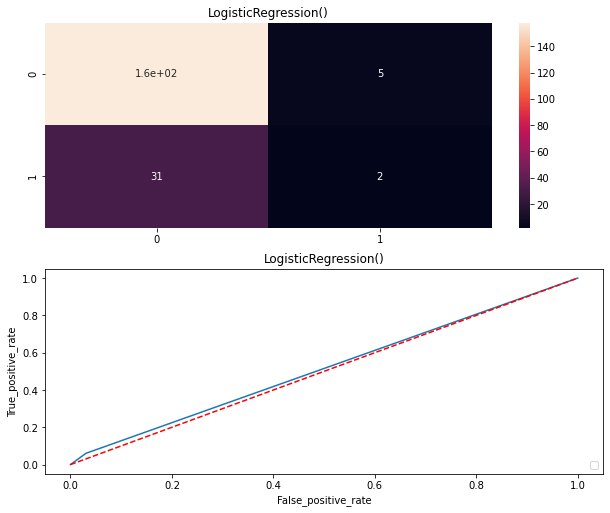

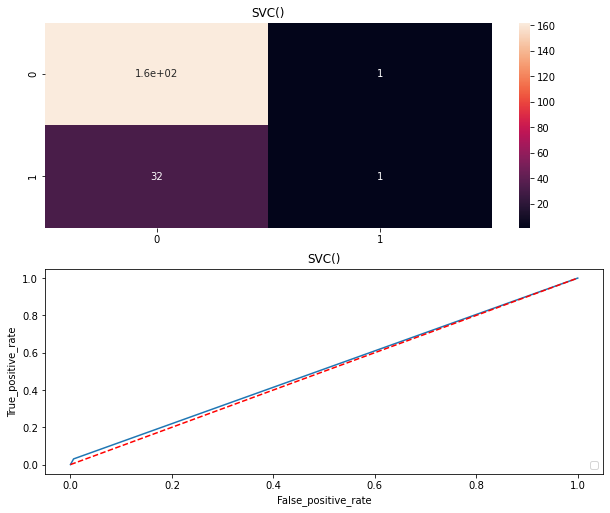

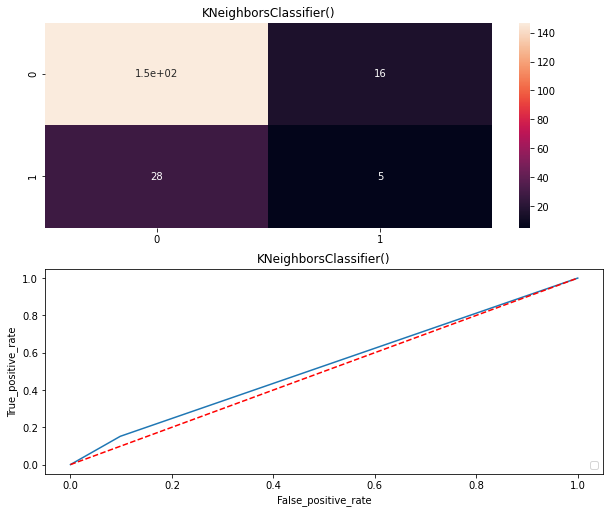

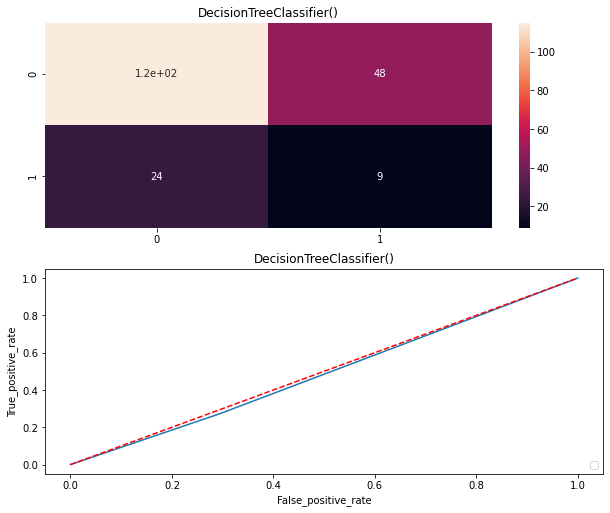

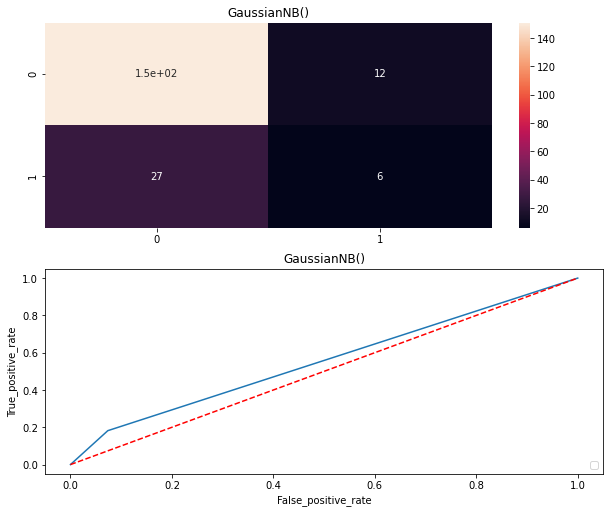

In [59]:
Model=[]
for m, model_name in models:
    print('**********',model_name,'*****************')
    m.fit(x_train,y_train)
    pred_y=m.predict(x_test)
    acc=accuracy_score(y_test,pred_y)
    print('Accuracy Score', acc)
    print('\n')
    csc=cross_val_score(m,x,y,cv=10, scoring='accuracy').mean()
    print('Cross_val_score', csc)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred_y)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    print('\n')
    print(classification_report(y_test,pred_y))
    print('\n')
    cms=confusion_matrix(y_test,pred_y)
    print('Confusion_matrix',cms)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(m)
    print(sns.heatmap(cms,annot=True))
    plt.subplot(912)
    plt.title(m)
    plt.plot(false_positive_rate,true_positive_rate)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n')
    

In [60]:
df1=pd.DataFrame(pred_y)
df1.to_csv('svc_prediction.csv')

In [61]:
import joblib
joblib.dump(svc,'svc_auto_insurance.pkl')

['svc_auto_insurance.pkl']

we could see clearly that the scores of svc were better than any other algorithm.